# Moneyball

## Introduction

This project is based on the book [Moneyball: The Art of Wining an Unfair Game](https://en.wikipedia.org/wiki/Moneyball). During the 2001-2002 offseason the baseball team Oakland's Athletics lost three key players to teams with larger revenues. The book focus on the Oakland's A's. analytical and evidence-based approach to decide how to assemble a competitive team despite the team's small budget. This approach brought the A's to the playoffs in 2002 and 2003 . 

In this notebook I will try to replicate these analysis in order to find undervalued players that could be good replacements for the lost players. Since I'm no baseball expert I will not go in many details about all the statistics, but I will be providing links to wikipedia articles for those interested.

[Data Source](http://www.seanlahman.com/baseball-archive/statistics/)


### Questions:
* Can the Oakland Athletics use statistics to replace lost key players with undervalued players with the same statistical values?

* Is it possible to save money in the process?

## Loading Packages and Importing Data

In [44]:
import warnings 
import pandas as pd 
import numpy as np 
from pylab import mpl, plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

In [45]:
plt.style.use('seaborn')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['font.family'] = 'serif'
plt.rcParams["figure.figsize"] = [10, 6]

Firs let's import Batting.csv file, which contains informatios from players from various seasons and teams, as a dataframe.

In [46]:
bat = pd.read_csv('Batting.csv')

Now let's have a look at the data.

In [47]:
bat.info() #checking shape, variable types, presence of missing values and file size.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108789 entries, 0 to 108788
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  108789 non-null  object 
 1   yearID    108789 non-null  int64  
 2   stint     108789 non-null  int64  
 3   teamID    108789 non-null  object 
 4   lgID      108052 non-null  object 
 5   G         108789 non-null  int64  
 6   AB        108789 non-null  int64  
 7   R         108789 non-null  int64  
 8   H         108789 non-null  int64  
 9   2B        108789 non-null  int64  
 10  3B        108789 non-null  int64  
 11  HR        108789 non-null  int64  
 12  RBI       108033 non-null  float64
 13  SB        106421 non-null  float64
 14  CS        85248 non-null   float64
 15  BB        108789 non-null  int64  
 16  SO        106689 non-null  float64
 17  IBB       72139 non-null   float64
 18  HBP       105973 non-null  float64
 19  SH        102721 non-null  float64
 20  SF  

In [48]:
bat.describe() #showing summary statistics for all numerical columns

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108033.000000,106421.000000,85248.000000,108789.000000,106689.000000,72139.000000,105973.000000,102721.000000,72686.000000,83348.000000
mean,1967.221631,1.078914,50.740488,139.241320,18.483496,36.388605,6.202024,1.247075,2.850150,16.790388,2.918775,1.177353,12.842907,20.559814,1.055227,1.057958,2.197087,1.022893,2.893495
std,39.747437,0.286916,46.889589,183.602089,28.043230,52.188884,9.627314,2.595462,6.368678,26.225046,7.608039,2.682099,20.595082,28.514873,2.709589,2.291269,4.154759,1.930262,4.672691
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1937.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,46.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,1.000000,79.000000,224.000000,27.000000,56.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2020.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


Looking at yearID column we notice that this dataset has information from players from 1871 to 2020. We can also check that there are many missing values on this dataset, but for the purposes of this project we will neglect them.

## Feature Engineering

Aside from all the features present on this table, the A's used three other statistics that we will need to add by hand.
These statistics are:

* [Batting Average](https://en.wikipedia.org/wiki/Batting_average): a statistics in baseball that measure the perfomance of batters in baseball.
* [On Base Percentage](https://en.wikipedia.org/wiki/On-base_percentage): measures how frequently a batter reaches base.
* [Slugging Percentage](https://en.wikipedia.org/wiki/Slugging_percentage): a measure of the batting productitivity of a hitter.

Batting average is calculated by dividing [Hits](https://en.wikipedia.org/wiki/Hit_(baseball)) (H) by [At Bats](https://en.wikipedia.org/wiki/At_bat) (AB)  

In [49]:
bat['BA'] = bat['H']/bat['AB'] #adding the column BA to the dataframe.

On base percentage has a more complex formula:

\begin{equation}
OBP = \frac{H+BB+HBP}{AB+BB+HBP+SF}
\end{equation}

where BB is [Bases on Balls](https://en.wikipedia.org/wiki/Base_on_balls), HBP is [Hit by Pitch](https://en.wikipedia.org/wiki/Hit_by_pitch) and SF stands for [Sacrifice Fly](https://en.wikipedia.org/wiki/Sacrifice_fly).

In [50]:
bat['OBP'] = (bat['H']+bat['BB']+bat['HBP'])/(bat['AB']+bat['BB']+bat['HBP']+bat['SF']) #adding the column OBP to the dataframe.

Finally, Slugging Percentage is given by the fraction between [Total Bases](https://en.wikipedia.org/wiki/Total_bases) and At Bats.

\begin{equation}
SLG = \frac{1B + 2\times 2B + 3\times 3B + 4\times HR}{AB}
\end{equation}

where 1B, 2B and 3B stands for [Singles](https://en.wikipedia.org/wiki/Single_(baseball)), [Doubles](https://en.wikipedia.org/wiki/Double_(baseball)) and [Triples](https://en.wikipedia.org/wiki/Triple_(baseball)); and HR is [Home Run](https://en.wikipedia.org/wiki/Home_run). Since the dataframe has no info on 1B we will need to calculate it by subtractings doubles, triples and home runs from total hits.

In [51]:
bat['1B'] = bat['H']-bat['2B']-bat['3B']-bat['HR'] #calculating 1B

bat['SLG'] =(bat['1B']+2*bat['2B']+3*bat['3B']+4*bat['HR'])/bat['AB'] #adding the column SLG to the dataframe.

In [52]:
bat.head() #checking if all columns have been properly added.

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,BA,OBP,1B,SLG
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,0,0.000000
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,0.0,NaN,NaN,NaN,NaN,0.0,0.271186,NaN,26,0.322034
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,5.0,NaN,NaN,NaN,NaN,1.0,0.291971,NaN,31,0.394161
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,2.0,NaN,NaN,NaN,NaN,0.0,0.330827,NaN,30,0.481203
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,1.0,NaN,NaN,NaN,NaN,0.0,0.325000,NaN,25,0.466667


## Mixing statistics with Money

As we stated in the introduction of this notebook, we are searching for undervalued players with the similar statistics from the three lost player. In order to do this we will import a second file named Salaries.csv as a dataframe

In [53]:
sal = pd.read_csv('Salaries.csv')

In [54]:
sal.head() #checking the first 5 rows

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


This dataframe contains information from 1985 to 2020. We will use playerID and yearID to merge both dataframes, this will automatically discard data from before 1985.

In [67]:
df = pd.merge(bat,sal, on =['playerID','yearID'])

In [69]:
df.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,BA,OBP,1B,SLG,teamID_y,lgID_y,salary
0,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0.0,NaN,NaN,0,NaN,TOR,AL,170000
1,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0.0,NaN,NaN,0,NaN,CHA,AL,147500
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,4.0,3.0,7.0,0.278788,0.377551,30,0.466667,PHI,NL,237000
3,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0.0,0.0,0.0,NaN,NaN,0,NaN,TOR,AL,875000
4,allenne01,1985,1,SLN,NL,23,2,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0,0.000000,SLN,NL,750000


In [70]:
df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,IBB,HBP,SH,SF,GIDP,BA,OBP,1B,SLG,salary
count,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,...,28294.000000,28294.000000,28294.000000,28294.000000,28294.000000,21817.000000,21881.000000,28294.000000,21817.000000,2.829400e+04
mean,2000.937902,1.099738,63.935675,161.886301,21.788259,42.627059,8.221107,0.909203,4.777055,20.784301,...,1.326041,1.450661,1.534530,1.366898,3.662649,0.210684,0.268558,28.719693,0.315589,2.112891e+06
std,8.900519,0.315514,47.285396,199.406030,30.134315,56.201520,11.401498,1.832387,8.384311,29.704435,...,3.160552,2.782307,2.748303,2.207763,5.243753,0.120949,0.141618,37.742462,0.195983,3.440201e+06
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1994.000000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.205479,0.000000,0.200000,3.000000e+05
50%,2001.000000,1.000000,50.000000,57.000000,4.000000,10.000000,2.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.240631,0.303738,7.000000,0.350230,6.000000e+05
75%,2009.000000,1.000000,101.000000,298.000000,37.000000,76.000000,14.000000,1.000000,6.000000,34.000000,...,1.000000,2.000000,2.000000,2.000000,6.000000,0.275492,0.343972,51.000000,0.430233,2.425000e+06
max,2016.000000,4.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,...,120.000000,35.000000,39.000000,17.000000,35.000000,1.000000,1.000000,225.000000,4.000000,3.300000e+07


## Checking Lost Players Data

The three key players that Oakland's A's lost in the year 2001 were: first baseman Jason Giambi ('giambja01') to the New York Yankees, outfielder Johnny Damon ('damonjo01') to the Boston Red Sox and infielder Rainer Gustavo "Ray" Olmedo ('saenzol01').
By filtering our dataframe we can look for information regarding only these three players.

In [79]:
lostp = df[(df['playerID']=='giambja01')|(df['playerID']=='damonjo01')|(df['playerID']=='saenzol01')]
lostp.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,BA,OBP,1B,SLG,teamID_y,lgID_y,salary
8003,damonjo01,1995,1,KCA,AL,47,188,32,53,11,...,2.0,3.0,2.0,0.281915,0.323529,34,0.441489,KCA,AL,109000
8122,giambja01,1995,1,OAK,AL,54,176,27,45,7,...,1.0,2.0,4.0,0.255682,0.363636,32,0.397727,OAK,AL,109000
9085,damonjo01,1996,1,KCA,AL,145,517,61,140,22,...,10.0,5.0,4.0,0.270793,0.312950,107,0.367505,KCA,AL,180000
9182,giambja01,1996,1,OAK,AL,140,536,84,156,40,...,1.0,5.0,15.0,0.291045,0.355109,95,0.481343,OAK,AL,120000
10112,damonjo01,1997,1,KCA,AL,146,472,70,130,12,...,6.0,1.0,3.0,0.275424,0.337838,102,0.385593,KCA,AL,240000


Since we want to analyze information from 2001 we will add a second filter and check statististics of interest.

In [87]:
the3 = lostp[lostp['yearID']==2001][['playerID','H','2B','3B','HR','OBP','SLG','BA','AB','salary']]
the3

,playerID,H,2B,3B,HR,OBP,SLG,BA,AB,salary
14178,damonjo01,165,34,4,9,0.323529,0.363354,0.256211,644,7100000
14273,giambja01,178,47,2,38,0.476900,0.659615,0.342308,520,4103333
14724,saenzol01,67,21,1,9,0.291176,0.383607,0.219672,305,290000


## Replacement Players

Now that we have the relevant information we will impose some constraints in our search for replacement players:

* The total combined salary of the three players must not exceed 15 million dolars.

* Their combined number of At Bats needs to be equal to or greater than the lost players.

* Their mean OBP had to be equal to or greater than the mean OBP of the lost players.

Let's check these values for the 3 lost players:

In [98]:
print('Total Salary: {},\nTotal At Bats: {}, \nMean OBP {}'.format(the3['salary'].sum(),the3['AB'].sum(), the3['OBP'].mean()))

Total Salary: 11493333,
Total At Bats: 1469, 
Mean OBP 0.36386867712807924


To have a better idea on how OBP relates to salary in 2001, let's check their scatter plot

<AxesSubplot:xlabel='OBP', ylabel='salary'>

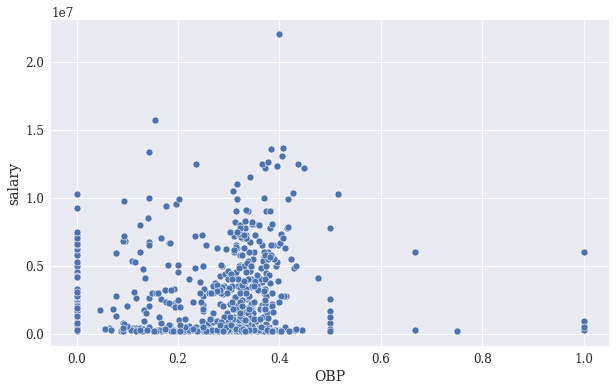

In [107]:
sns.scatterplot(x = 'OBP',y = 'salary', data =df[df['yearID']==2001].dropna())

It looks reasonable to add another constraint to make our choices: let's avoid players with salary bigger than Johnny Damon, which is U$7100000. Combining this with an OBP value greater or equal to 0.3639, we can start to have a good idea of who we can choose as a good replacement.

In [110]:
candidates = df[(df['yearID']==2001)&(df['salary']<7100000)&(df['OBP']>=0.3639)]
candidates.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,BA,OBP,1B,SLG,teamID_y,lgID_y,salary
14003,abreubo01,2001,1,PHI,NL,162,588,118,170,48,...,0.0,9.0,13.0,0.289116,0.393466,87,0.542517,PHI,NL,4983000
14005,agbaybe01,2001,1,NYN,NL,91,296,28,82,14,...,1.0,1.0,11.0,0.277027,0.363905,60,0.398649,NYN,NL,260000
14014,aloumo01,2001,1,HOU,NL,136,513,79,170,31,...,0.0,8.0,18.0,0.331384,0.395869,111,0.553606,HOU,NL,5250000
14027,ashbyan01,2001,1,LAN,NL,3,2,1,1,0,...,2.0,0.0,0.0,0.500000,0.666667,1,0.500000,LAN,NL,6000000
14030,aurilri01,2001,1,SFN,NL,156,636,114,206,37,...,3.0,3.0,14.0,0.323899,0.368805,127,0.572327,SFN,NL,3250000


To improve the search we can now look at the mean value of AB for the three lost players and use it as another filter

In [111]:
the3['AB'].mean()

489.6666666666667

Now we can finally check our top 10 choices by descending order of OBP, with AB above the mean of the three former players and salaries lower than Johnny Damon. 

In [119]:
flist = candidates[candidates['AB']>=488].sort_values(by='OBP', ascending = False)
flist.head(10)

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SH,SF,GIDP,BA,OBP,1B,SLG,teamID_y,lgID_y,salary
14273,giambja01,2001,1,OAK,AL,154,520,109,178,47,...,0.0,9.0,17.0,0.342308,0.476900,91,0.659615,OAK,AL,4103333
14340,heltoto01,2001,1,COL,NL,159,587,132,197,54,...,1.0,5.0,14.0,0.335605,0.431655,92,0.684838,COL,NL,4950000
14068,berkmla01,2001,1,HOU,NL,156,577,110,191,55,...,0.0,6.0,8.0,0.331023,0.430233,97,0.620451,HOU,NL,305000
14292,gonzalu01,2001,1,ARI,NL,162,609,128,198,36,...,0.0,5.0,14.0,0.325123,0.428571,98,0.688013,ARI,NL,4833333
14215,edmonji01,2001,1,SLN,NL,150,500,95,152,38,...,1.0,10.0,8.0,0.304000,0.410214,83,0.564000,SLN,NL,6333333
14660,pujolal01,2001,1,SLN,NL,161,590,112,194,47,...,1.0,7.0,21.0,0.328814,0.402963,106,0.610169,SLN,NL,200000
14588,olerujo01,2001,1,SEA,AL,159,572,91,173,32,...,1.0,7.0,21.0,0.302448,0.401180,119,0.472028,SEA,AL,6700000
14033,bagweje01,2001,1,HOU,NL,161,600,126,173,43,...,0.0,5.0,20.0,0.288333,0.397490,87,0.568333,HOU,NL,6500000
14014,aloumo01,2001,1,HOU,NL,136,513,79,170,31,...,0.0,8.0,18.0,0.331384,0.395869,111,0.553606,HOU,NL,5250000
14003,abreubo01,2001,1,PHI,NL,162,588,118,170,48,...,0.0,9.0,13.0,0.289116,0.393466,87,0.542517,PHI,NL,4983000


Ignoring giambja01, we have a list of candidates to replace the lost players in the Oakland A's. By any means this search is over, but using this reduced data allows it to be a lot easier.

To check if it's possible to save money while hiring these new players we only need to look at the top 3 choices: heltoto01, berkmla01 and gozalu01. Combining their salaries and comparing with the lost players salaries will give us 

In [143]:
the3['salary'].sum() - flist['salary'][1:4].sum()

1405000

which means that the team can save more than 1 million dollars with this choice.